# Explore here

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [18]:
data = pd.read_csv('/Users/julian/Desktop/vs code/fghfghfghfgh/Machine-learning-python-template_Project_12_Julian_Lopez/data/raw/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [19]:
# Obtener las dimensiones
data.shape

(48895, 16)

In [20]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Una vez hemos obtenido esta información, es importante que seamos capaces de extraer conclusiones, como las siguientes:

- Existen un total de 1309 filas (en este caso, personas) y 12 columnas, de entre las que encontramos el objetivo o clase a predecir, `Survived`.
- La variable `Cabin` solo tiene 295 instancias con valores, por lo que contendría más de 1000 valores nulos. La variable `Age` también cuenta con valores nulos, pero en un número mucho más reducido que el anterior. El resto de variables cuentan siempre con valor.
- Los datos cuentan con 7 características numéricas y 5 características categóricas.


In [21]:
# verificar si hay duplicados
data.duplicated().sum()

np.int64(0)

In [22]:
# eliminar informacion irrelevante 
data_limpia = data.drop(['id', 'name', 'host_name', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis = 1, inplace = False)
data_limpia.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0


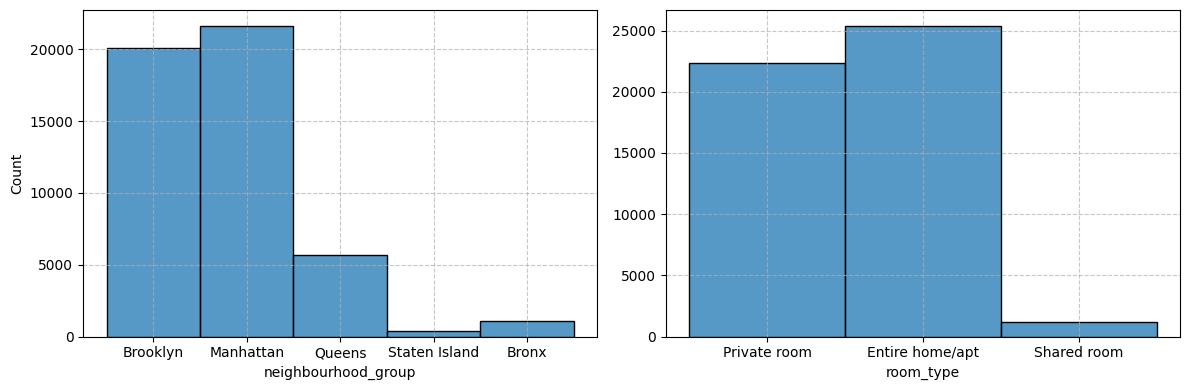

In [23]:
# Análisis sobre variables categóricas

fig, axis = plt.subplots(1, 2, figsize = (12, 4))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = data_limpia, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = data_limpia, x = "room_type").set(ylabel = None)

axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

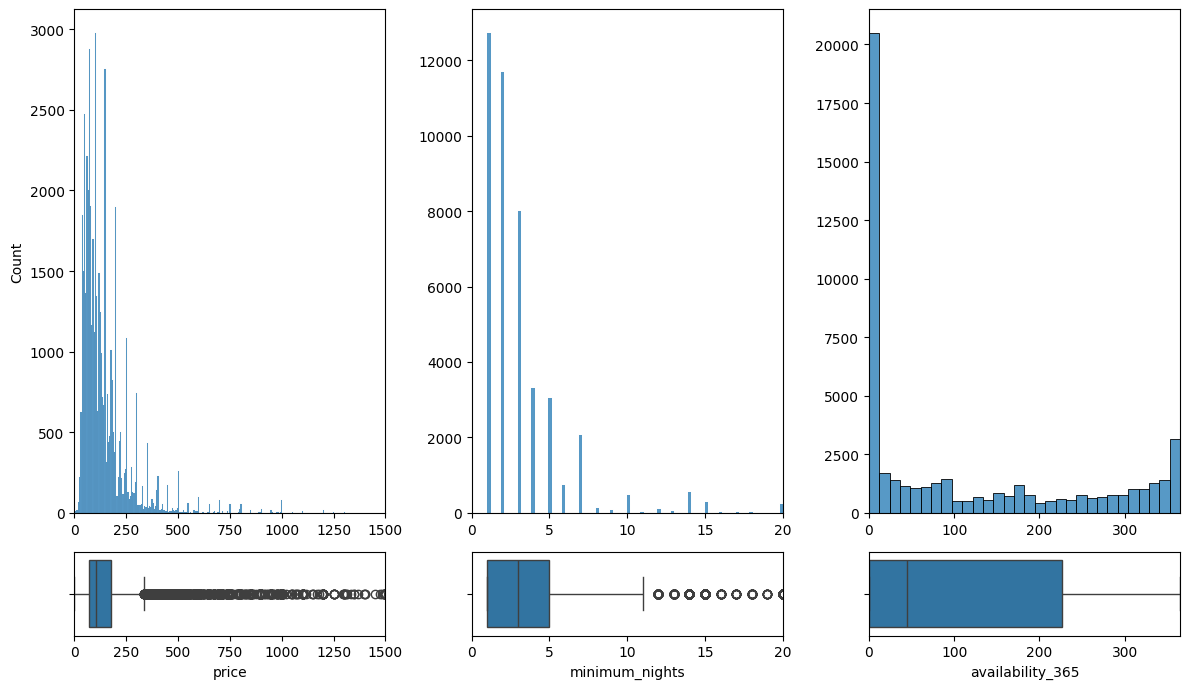

In [24]:
# Análisis sobre variables numéricas

fig, axis = plt.subplots(2, 3, figsize = (12, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_limpia, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpia, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpia, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpia, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpia, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpia, x = "availability_365")

axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[0, 1].set_xlim(0, 20)
axis[1, 1].set_xlim(0, 20)
axis[0, 2].set_xlim(0, 365)
axis[1, 2].set_xlim(0, 365)

plt.tight_layout()
plt.show()



- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

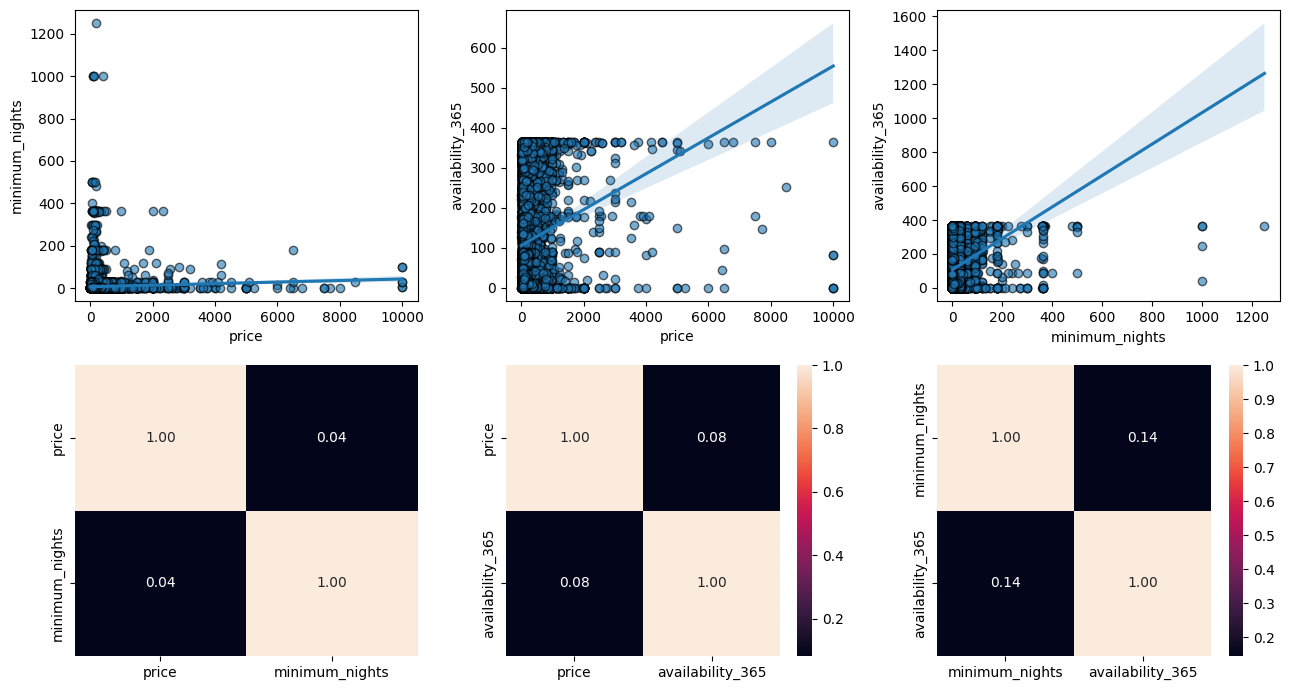

In [25]:
# Análisis numérico-numérico

fig, axis = plt.subplots(2, 3, figsize = (13, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpia, x = "price", y = "minimum_nights", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "price", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = data_limpia, x = "minimum_nights", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(data_limpia[["minimum_nights", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()
plt.show()


- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

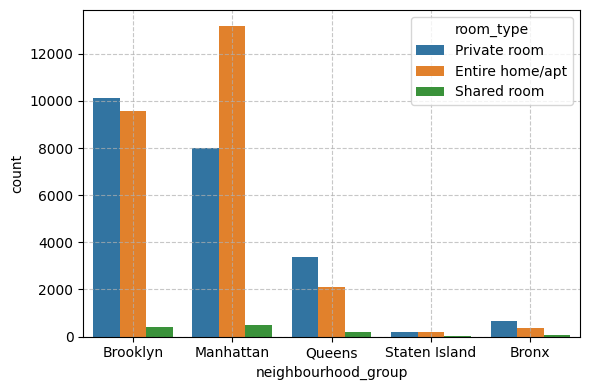

In [26]:
# Análisis categórico-categórico

plt.figure(figsize = (6, 4))
sns.countplot(data = data_limpia, x = "neighbourhood_group", hue = "room_type")

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

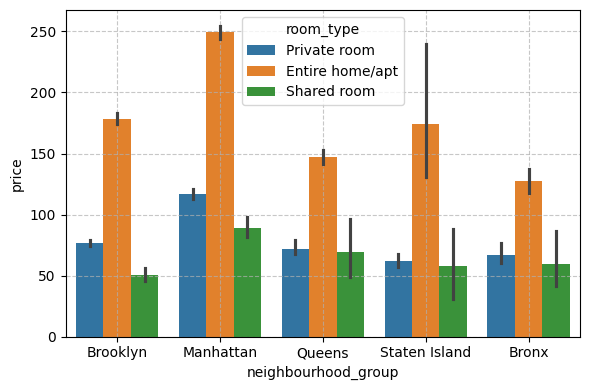

In [27]:
# Combinaciones de la clase con varias predictoras
plt.figure(figsize = (6, 4))
sns.barplot(data_limpia, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

In [ ]:
# Análisis de correlaciones

# Factorizacion

data_limpia["neighbourhood_group_n"] = pd.factorize(data_limpia["neighbourhood_group"])[0]

data_limpia["room_type_n"] = pd.factorize(data_limpia["room_type"])[0]


# Meter los cambios de factorizacion en un diccionario para que cuando entren datos nuevos pueda saber que numero le hemos asociado a cada valor en la trasnformacion.

neighbourhood_group_transformation_rules = {row["neighbourhood_group"]: row["neighbourhood_group_n"] for _, row in data_limpia[["neighbourhood_group", "neighbourhood_group_n"]].drop_duplicates().iterrows()}

room_type_transformation_rules = {row["room_type"]: row["room_type_n"] for _, row in data_limpia[["room_type", "room_type_n"]].drop_duplicates().iterrows()}

# Crea un diccionario que contenga todos los otros diccionarios.

all_transformation_rules = {
    "neighbourhood_group": neighbourhood_group_transformation_rules,
    "room_type": room_type_transformation_rules,
}

# Meter el diccionario en un json para guardarlo y poder disponer de el cuando quiera. 

with open("Transformation_rules.json", "w") as f:
    json.dump(all_transformation_rules, f)



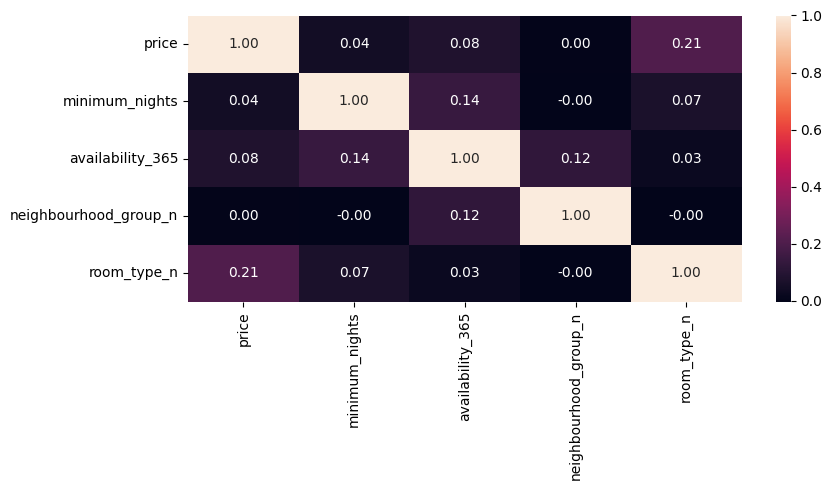

In [44]:
# Matriz de correlaciones.

fig, axis = plt.subplots(figsize = (9, 5))

sns.heatmap(data_limpia[["price", "minimum_nights", "availability_365", "neighbourhood_group_n", "room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

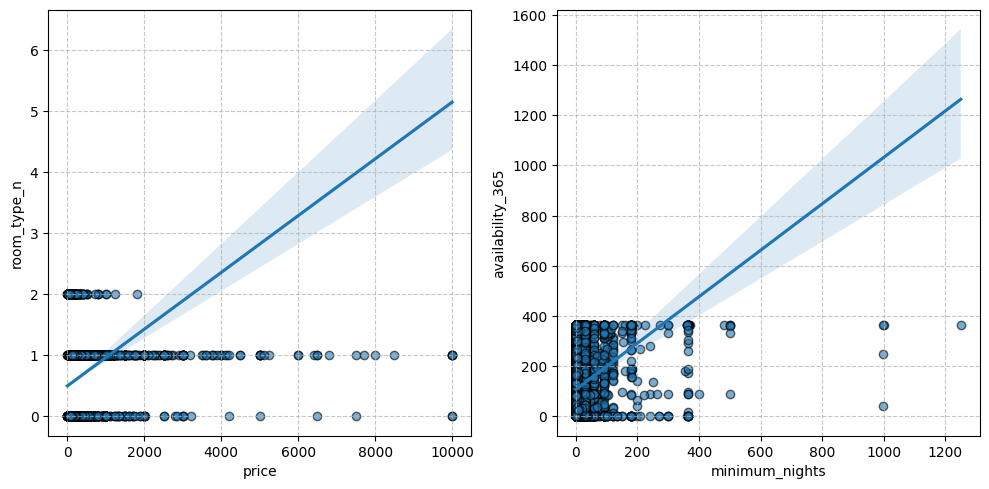

In [ ]:
# Existe una relación entre Precio y Room_type, como es lógico y tambien entre minimum_nights y availability_365.

# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "price", y = "room_type_n", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "minimum_nights", y = "availability_365", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

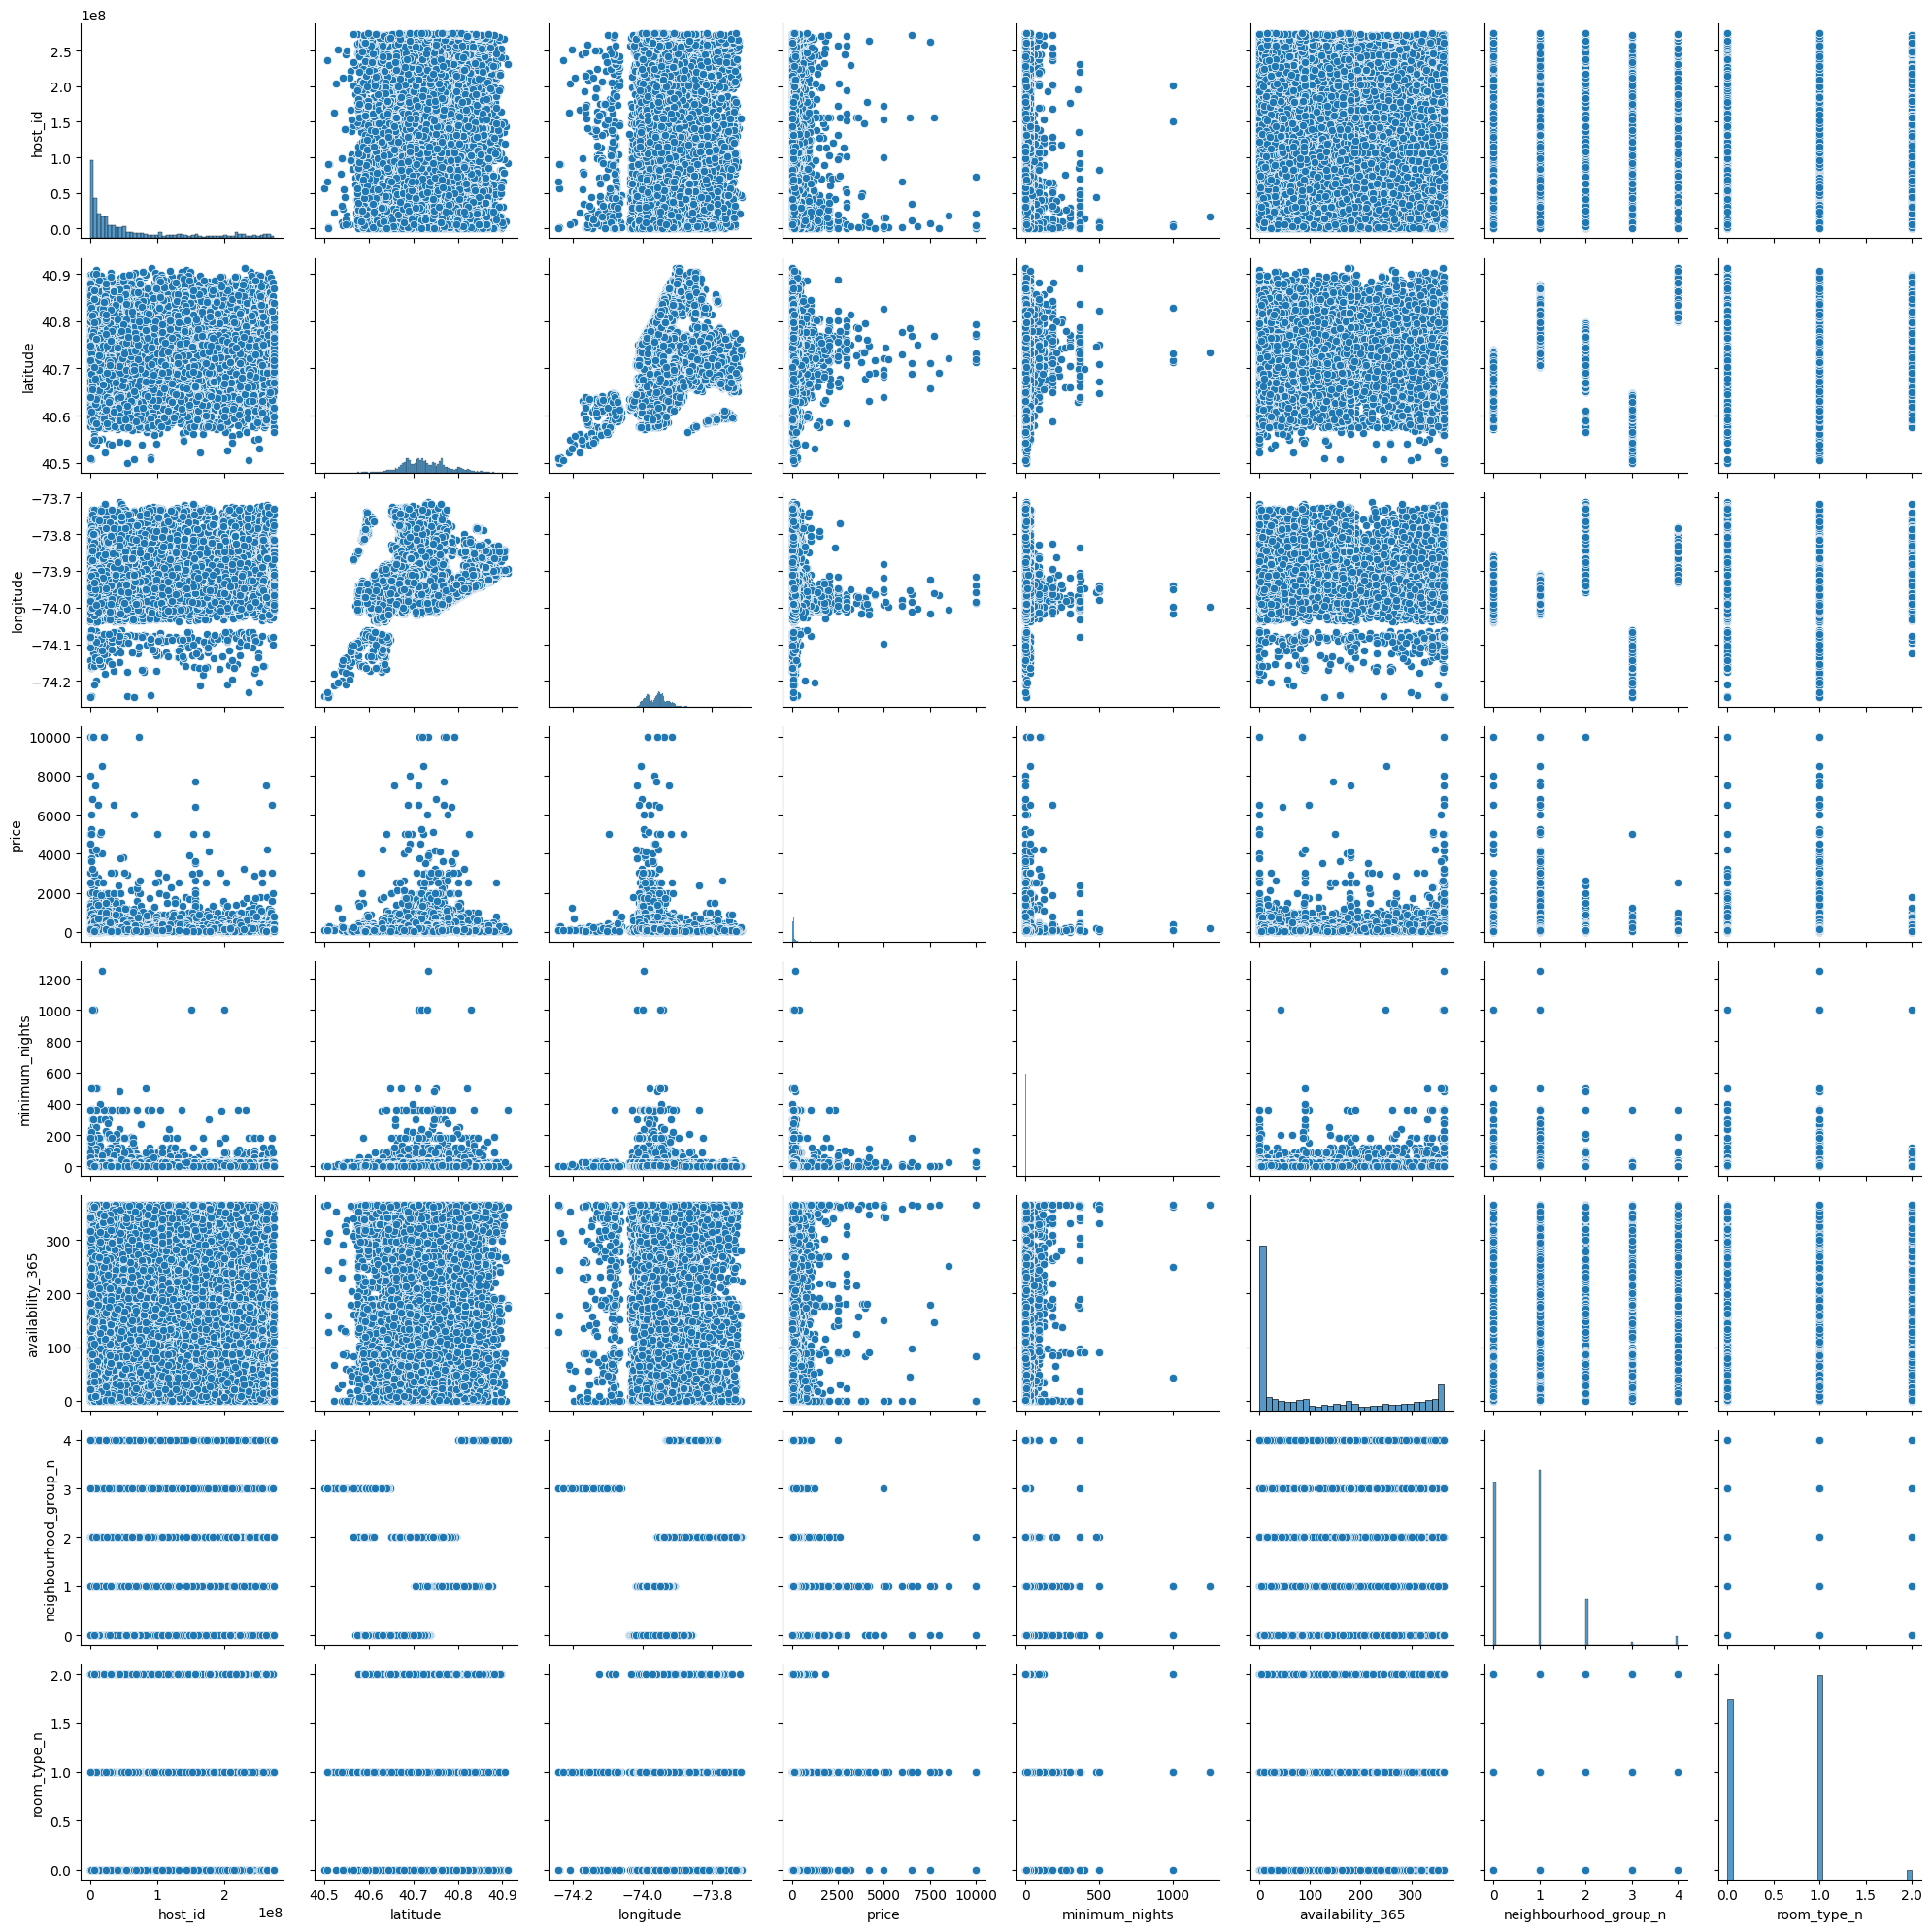

In [53]:
sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()